In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
Path = 'Superstore.csv'
df = pd.read_csv(Path, encoding='latin-1') # or 'ISO-8859-1', or any other relevant encoding
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

1. Retrieve Total Sales and Profit by Category


In [5]:
Total_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
Total_sales

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


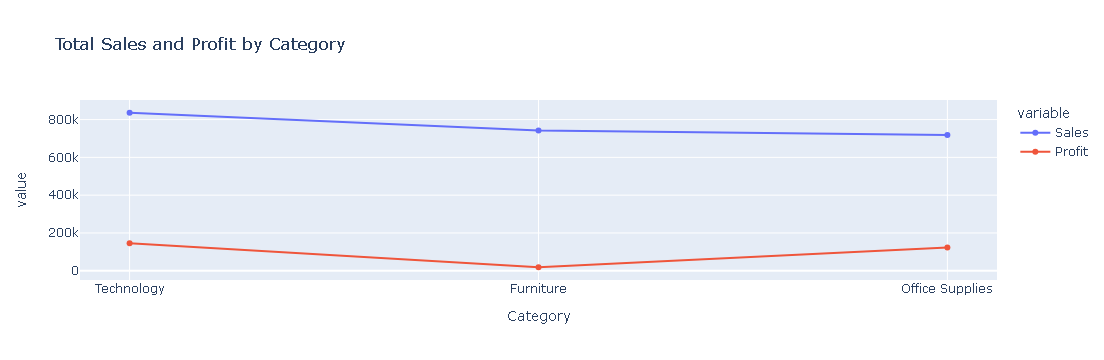

In [11]:
Total_sales_reset = Total_sales.reset_index()
fig = px.line(Total_sales_reset, x='Category', y=['Sales', 'Profit'], markers=True, 
              title='Total Sales and Profit by Category')
fig.show()

2. Find the Top 5 Most Profitable Products


In [7]:
Profitable_products = df.groupby('Product Name')['Sales'].sum().head().sort_values(ascending = False)
Profitable_products

Product Name
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
#10 Self-Seal White Envelopes                           108.682
#10 Gummed Flap White Envelopes, 100/Box                 41.300
"While you Were Out" Message Book, One Form per Page     25.228
Name: Sales, dtype: float64

3. Get the Total Number of Orders Placed in Each Region


In [32]:
Order_placed = df.groupby('Region')['Order ID'].count().sort_values(ascending =False)
Order_placed

Region
West       3203
East       2848
Central    2323
South      1620
Name: Order ID, dtype: int64

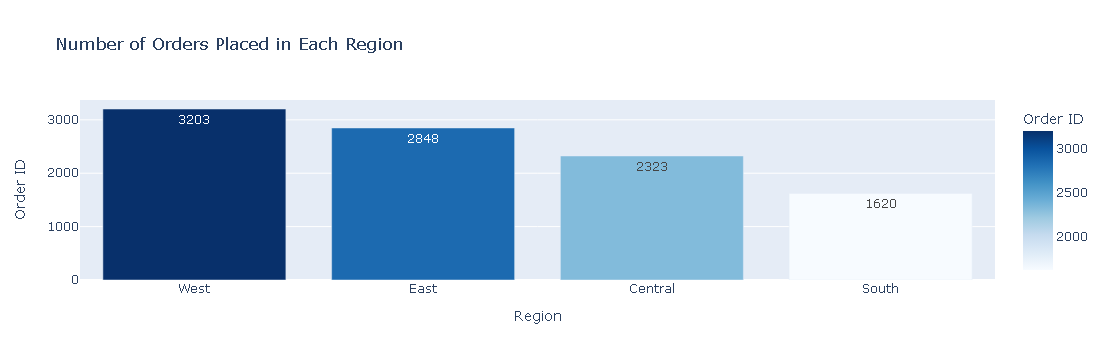

In [33]:
order_placed_reset = Order_placed.reset_index()

fig = px.bar(order_placed_reset, x='Region', y = 'Order ID',
           title = 'Number of Orders Placed in Each Region',
            text = 'Order ID',
            color = 'Order ID',
            color_continuous_scale='Blues')
fig.show()

4. Find the Top 5 Customers with the Highest Number of Orders


In [9]:
Top_customer = df.groupby('Customer Name')['Order ID'].count().sort_values(ascending = False).head()
Top_customer

Customer Name
William Brown    37
Matt Abelman     34
John Lee         34
Paul Prost       34
Edward Hooks     32
Name: Order ID, dtype: int64

5. Calculate the Average Discount Given per Sub-Category

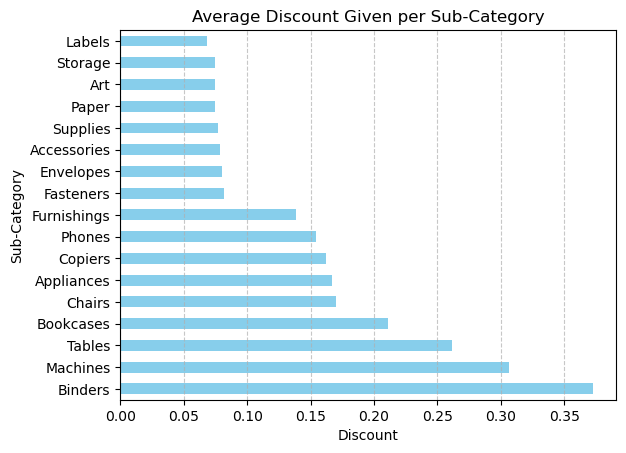

In [45]:
Avg_discount = df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending = False)
Avg_discount.plot(kind ='barh',color ='skyblue')
plt.xlabel('Discount')
plt.title('Average Discount Given per Sub-Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

6. List All Orders Where Profit is Negative (Loss-Making Orders)


In [34]:
Negetive_Prof = df[df['Profit']<0].head()
Negetive_Prof

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2012-118983,22-11-2012,26-11-2012,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2012-118983,22-11-2012,26-11-2012,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2014-156909,17-07-2014,19-07-2014,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2012-150630,17-09-2012,21-09-2012,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


7. Find the Top 5 Cities with the Highest Sales Revenue


In [20]:
Top_city = df.groupby('City')['Sales'].sum().sort_values(ascending =False).head()
Top_city

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64

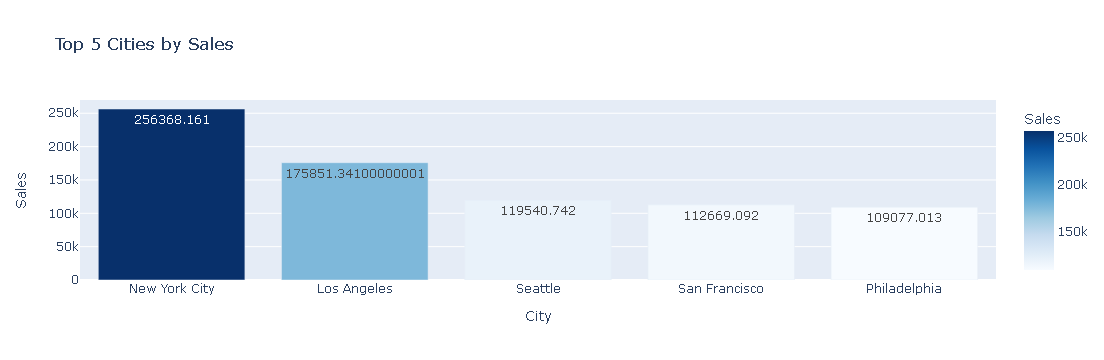

In [21]:
Top_city_reset = Top_city.reset_index()
fig = px.bar(Top_city_reset, x='City', y='Sales', 
             title='Top 5 Cities by Sales', 
             text='Sales', 
             color='Sales', 
             color_continuous_scale='Blues')
fig.show()

8. Get the Total Quantity Sold for Each Shipping Mode



In [48]:
Quantity_sold = df.groupby('Ship Mode')['Quantity'].sum().sort_values(ascending=False)
Quantity_sold

Ship Mode
Standard Class    22797
Second Class       7423
First Class        5693
Same Day           1960
Name: Quantity, dtype: int64

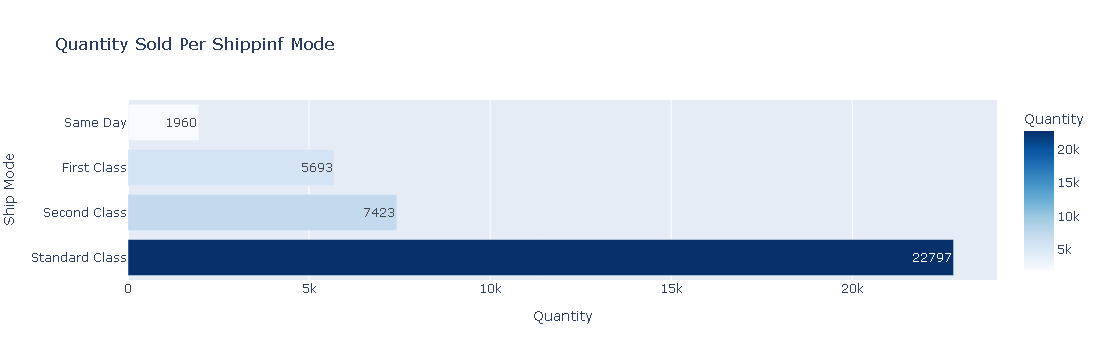

In [50]:
Quantitysold = Quantity_sold.reset_index()

fig = px.bar(Quantitysold,y ='Ship Mode', x ='Quantity',
             title = 'Quantity Sold Per Shippinf Mode',
             text ='Quantity',
             color = 'Quantity',
             color_continuous_scale='Blues')
fig.show()

9. Find the renvnue in All Years


In [69]:
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().sort_index()
yearly_sales

Year
2011    484247.4981
2012    470532.5090
2013    608473.8300
2014    733947.0232
Name: Sales, dtype: float64

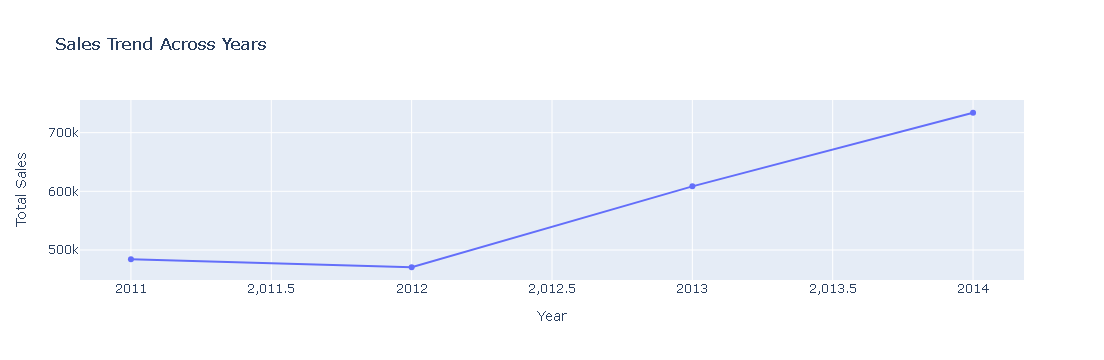

In [73]:
fig = px.line(yearly_sales_df, x='Year', y='Sales', 
              title='Sales Trend Across Years', 
              labels={'Year': 'Year', 'Sales': 'Total Sales'},
              markers=True)

fig.show()

10. Get the Top 5 States with the Highest Total Discount Applied

In [75]:
Top_states_discount = df.groupby('State')['Discount'].sum().sort_values(ascending=False).head(5)
Top_states_discount


State
Texas           364.64
Pennsylvania    192.90
Illinois        191.90
Ohio            152.40
California      145.60
Name: Discount, dtype: float64

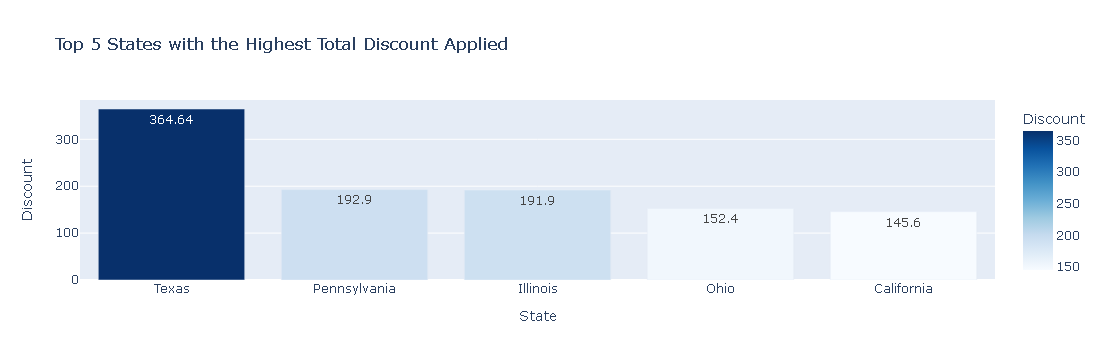

In [86]:
Top_states_discount_df = Top_states_discount.reset_index()
fig = px.bar(Top_states_discount_df,y='Discount', x='State',
              title ='Top 5 States with the Highest Total Discount Applied',
              text='Discount', color='Discount',
              color_continuous_scale='Blues')
fig.show()